In [125]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [4]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [6]:
fish_target = df.loc[cond, ['Species']]
# fish_target

In [7]:
# sklearn 유틸리티 도구 : train_test_split => 데이터를 무작위로 섞고 자르기까지
# 기본적으로 train 75%, test 25%
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = \ # \: 한 줄 내려서 코드 이어쓰기
train_test_split(fish_data, fish_target)
# fish_data와 fish_target데이터를 각각 train 데이터의 데이터와 결과값, test 데이터의 데이터와 결과값 총 4개의 데이터로 나눔

In [48]:
# test_target
train_target['Species']

10     Bream
0      Bream
16     Bream
28     Bream
157    Smelt
15     Bream
5      Bream
33     Bream
154    Smelt
20     Bream
153    Smelt
14     Bream
30     Bream
34     Bream
26     Bream
145    Smelt
24     Bream
3      Bream
6      Bream
158    Smelt
9      Bream
22     Bream
2      Bream
149    Smelt
151    Smelt
1      Bream
23     Bream
147    Smelt
31     Bream
8      Bream
4      Bream
152    Smelt
17     Bream
146    Smelt
25     Bream
29     Bream
Name: Species, dtype: object

In [49]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [19]:
kn.score(test_input, test_target['Species'])

1.0

In [20]:
kn.predict([[25, 150]])

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

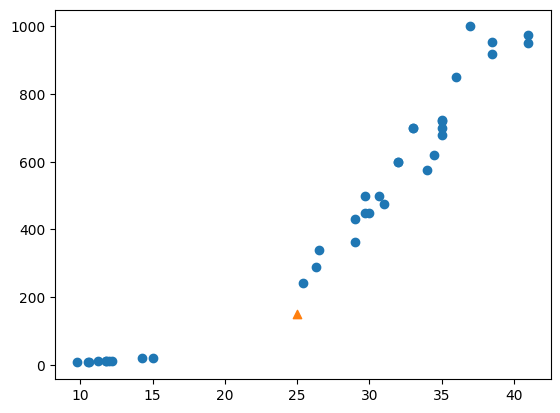

In [23]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')

In [24]:
kn.kneighbors([[25, 150]]) # [25, 150]와 가까이에 있는 데이터의 인덱스 번호와 거리를 보여줌

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 138.39320793,
         140.00603558]]),
 array([[ 1, 19,  4,  8, 25]]))

In [27]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     27.138889
Weight     456.180556
dtype: float64
Length2     10.257716
Weight     336.405622
dtype: float64


In [30]:
# 표준점수 (원본데이터 - 평균) / 표준편차
train_scaled = (train_input - mean) /  std

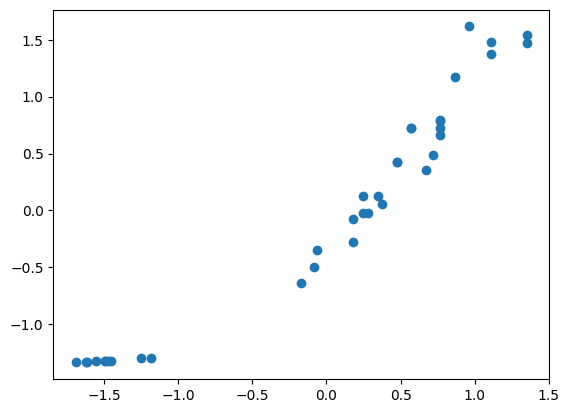

In [31]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [32]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [33]:
test_scaled = (test_input - mean) / std

In [34]:
kn.score(test_scaled, test_target['Species'])

1.0

In [37]:
new = ([25, 150] - mean) / std
new

Length2   -0.208515
Weight    -0.910153
dtype: float64

In [39]:
kn.predict([new])

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## Penguins
- Adelie, Gentoo 구분

In [127]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [151]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
df = df.loc[cond]
# df

In [224]:
cond1 = df['species'] == 'Adelie'
cond2 = df['species'] == 'Gentoo'

df1 = df.loc[cond1]
df2 = df.loc[cond2]

### 'bill_depth_mm'와 'flipper_length_mm'으로 'species'구분하기

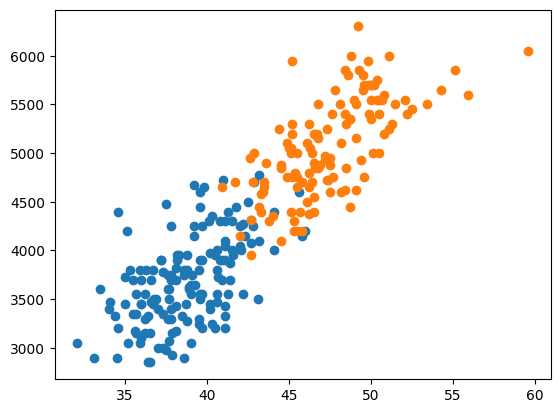

In [284]:
plt.scatter(df1['bill_length_mm'], df1['body_mass_g'])
plt.scatter(df2['bill_length_mm'], df2['body_mass_g'])

In [285]:
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bil_length_mm
0,Adelie,Torgersen,39.10000,18.700000,181.000000,3750.000000,Male,39.10000
1,Adelie,Torgersen,39.50000,17.400000,186.000000,3800.000000,Female,39.50000
2,Adelie,Torgersen,40.30000,18.000000,195.000000,3250.000000,Female,40.30000
3,Adelie,Torgersen,42.70292,16.836131,202.178832,4318.065693,NaN,42.70292
4,Adelie,Torgersen,36.70000,19.300000,193.000000,3450.000000,Female,36.70000


In [286]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
peng_data = df.loc[cond, ['bill_depth_mm', 'flipper_length_mm']]
peng_target = df.loc[cond, ['species']]
# peng_target

In [287]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(peng_data, peng_target)
# train_target

In [288]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [289]:
kn.score(test_input, test_target['species'])

0.9855072463768116

In [290]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

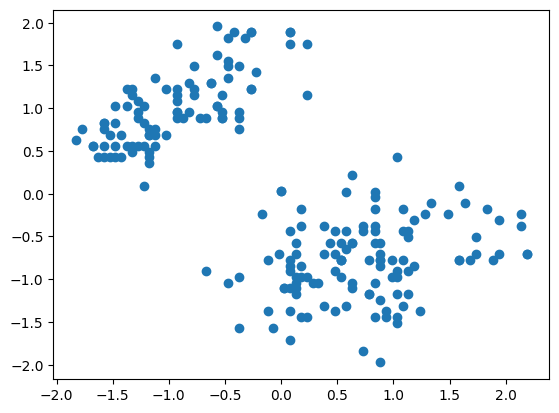

In [291]:
plt.scatter(train_scaled['bill_depth_mm'], train_scaled['flipper_length_mm'])

In [292]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [293]:
kn.score(test_scaled, test_target['species'])

1.0

### 'bill_depth_mm'와 'body_mass_g'으로 ''species'구분하기

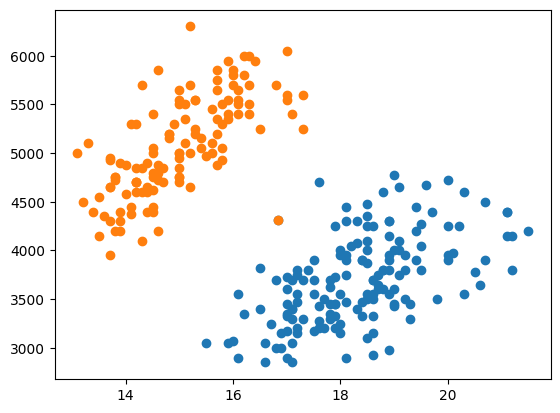

In [294]:
plt.scatter(df1['bill_depth_mm'], df1['body_mass_g'])
plt.scatter(df2['bill_depth_mm'], df2['body_mass_g'])

In [295]:
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bil_length_mm
0,Adelie,Torgersen,39.10000,18.700000,181.000000,3750.000000,Male,39.10000
1,Adelie,Torgersen,39.50000,17.400000,186.000000,3800.000000,Female,39.50000
2,Adelie,Torgersen,40.30000,18.000000,195.000000,3250.000000,Female,40.30000
3,Adelie,Torgersen,42.70292,16.836131,202.178832,4318.065693,NaN,42.70292
4,Adelie,Torgersen,36.70000,19.300000,193.000000,3450.000000,Female,36.70000


In [296]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
peng_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
peng_target = df.loc[cond, 'species']
peng_target

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 276, dtype: object

In [297]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(peng_data, peng_target)

In [298]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [299]:
kn.score(test_input, test_target)

0.855072463768116

In [300]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

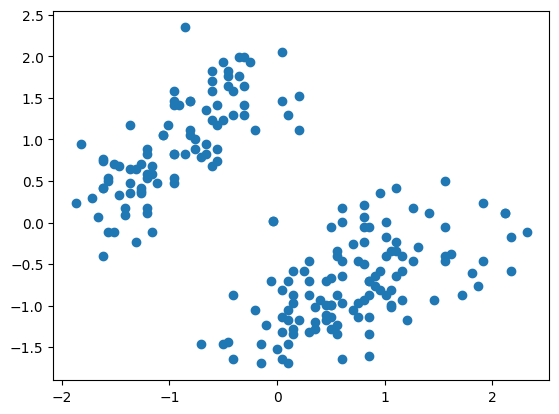

In [301]:
plt.scatter(train_scaled['bill_depth_mm'], train_scaled['body_mass_g'])

In [302]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [303]:
kn.score(test_scaled, test_target)

1.0

### 'bill_length_mm'와 'bill_depth_mm'으로 'species'구분하기

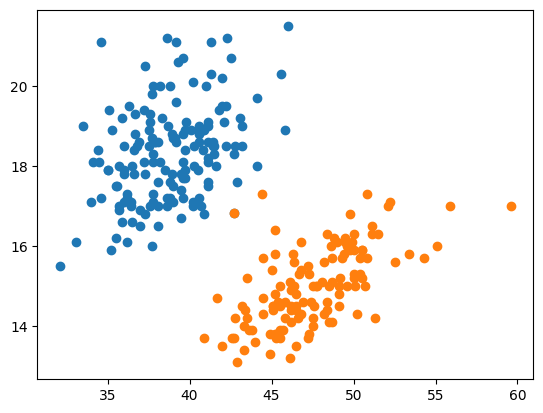

In [304]:
plt.scatter(df1['bill_length_mm'], df1['bill_depth_mm'])
plt.scatter(df2['bill_length_mm'], df2['bill_depth_mm'])

In [305]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bil_length_mm
0,Adelie,Torgersen,39.10000,18.700000,181.000000,3750.000000,Male,39.10000
1,Adelie,Torgersen,39.50000,17.400000,186.000000,3800.000000,Female,39.50000
2,Adelie,Torgersen,40.30000,18.000000,195.000000,3250.000000,Female,40.30000
3,Adelie,Torgersen,42.70292,16.836131,202.178832,4318.065693,NaN,42.70292
4,Adelie,Torgersen,36.70000,19.300000,193.000000,3450.000000,Female,36.70000


In [306]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
peng_data = df.loc[cond, ['bill_length_mm', 'bill_depth_mm']]
peng_target = df.loc[cond, ['species']]
# peng_target

In [307]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(peng_data, peng_target)

In [308]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [309]:
kn.score(test_input, test_target['species'])

1.0

In [310]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

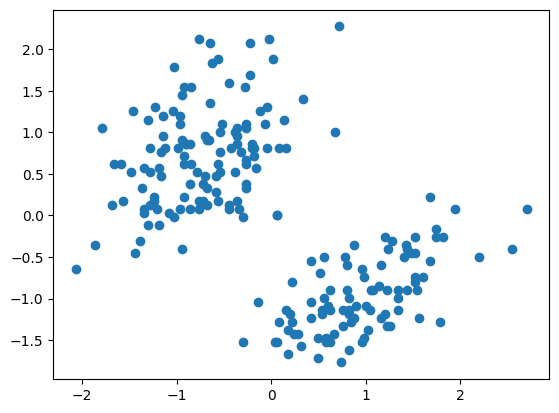

In [311]:
plt.scatter(train_scaled['bill_length_mm'], train_scaled['bill_depth_mm'])

In [312]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [313]:
kn.score(test_scaled, test_target['species'])

0.9855072463768116

### 'bill_length_mm'와 'flipper_length_mm'로 'species'구분하기

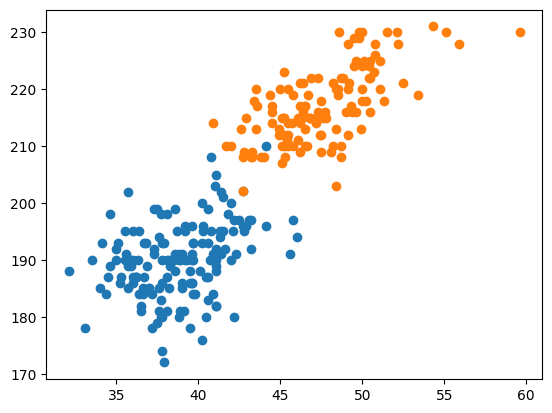

In [314]:
plt.scatter(df1['bill_length_mm'], df1['flipper_length_mm'])
plt.scatter(df2['bill_length_mm'], df2['flipper_length_mm'])

In [315]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bil_length_mm
0,Adelie,Torgersen,39.10000,18.700000,181.000000,3750.000000,Male,39.10000
1,Adelie,Torgersen,39.50000,17.400000,186.000000,3800.000000,Female,39.50000
2,Adelie,Torgersen,40.30000,18.000000,195.000000,3250.000000,Female,40.30000
3,Adelie,Torgersen,42.70292,16.836131,202.178832,4318.065693,NaN,42.70292
4,Adelie,Torgersen,36.70000,19.300000,193.000000,3450.000000,Female,36.70000


In [316]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
peng_data = df.loc[cond, ['bill_length_mm', 'flipper_length_mm']]
peng_target = df.loc[cond, 'species']
# peng_target

In [317]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(peng_data, peng_target)

In [318]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [319]:
kn.score(train_input, train_target)

0.9855072463768116

In [320]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

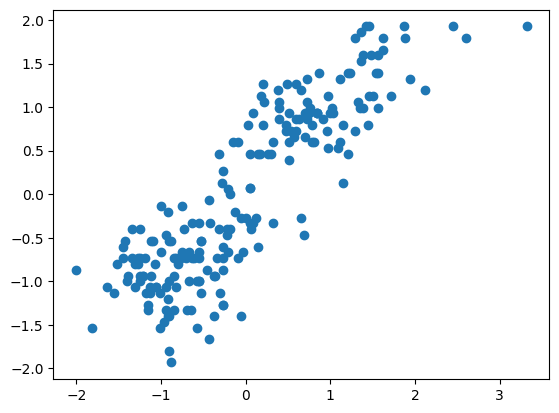

In [321]:
plt.scatter(train_scaled['bill_length_mm'], train_scaled['flipper_length_mm'])

In [322]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [323]:
kn.score(test_scaled, test_target)

1.0

### 'bill_length_mm'와 'body_mass_g'으로 'species'구분하기

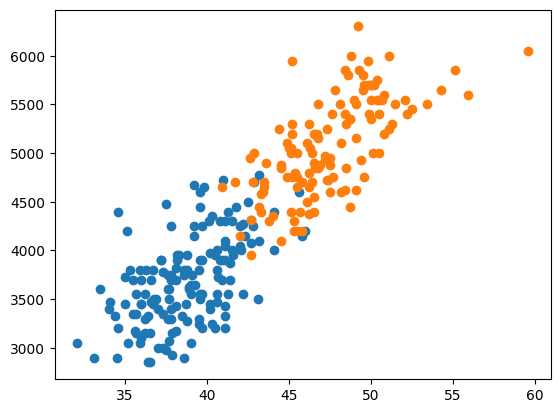

In [324]:
plt.scatter(df1['bill_length_mm'], df1['body_mass_g'])
plt.scatter(df2['bill_length_mm'], df2['body_mass_g'])

In [325]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bil_length_mm
0,Adelie,Torgersen,39.10000,18.700000,181.000000,3750.000000,Male,39.10000
1,Adelie,Torgersen,39.50000,17.400000,186.000000,3800.000000,Female,39.50000
2,Adelie,Torgersen,40.30000,18.000000,195.000000,3250.000000,Female,40.30000
3,Adelie,Torgersen,42.70292,16.836131,202.178832,4318.065693,NaN,42.70292
4,Adelie,Torgersen,36.70000,19.300000,193.000000,3450.000000,Female,36.70000


In [326]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
peng_data = df.loc[cond, ['bill_length_mm', 'body_mass_g']]
peng_target = df.loc[cond, 'species']

In [327]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(peng_data, peng_target)

In [328]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [329]:
kn.score(test_input, test_target)

0.8985507246376812

In [330]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

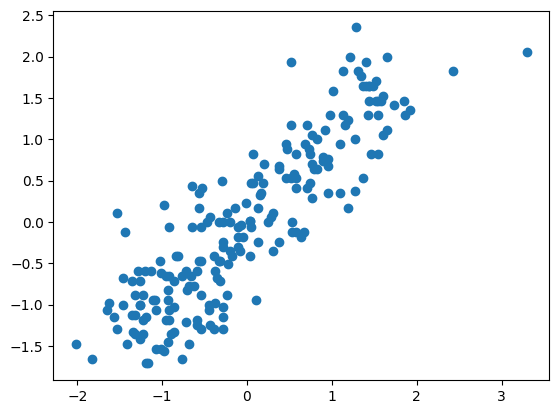

In [331]:
plt.scatter(train_scaled['bill_length_mm'], train_scaled['body_mass_g'])

In [332]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [333]:
kn.score(test_scaled, test_target)

0.9565217391304348

### 'flipper_length_mm'와 'body_mass_g'으로 'species'구분하기

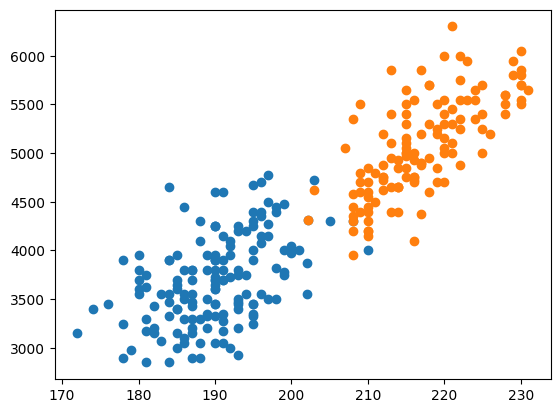

In [334]:
plt.scatter(df1['flipper_length_mm'], df1['body_mass_g'])
plt.scatter(df2['flipper_length_mm'], df2['body_mass_g'])

In [335]:
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bil_length_mm
0,Adelie,Torgersen,39.10000,18.700000,181.000000,3750.000000,Male,39.10000
1,Adelie,Torgersen,39.50000,17.400000,186.000000,3800.000000,Female,39.50000
2,Adelie,Torgersen,40.30000,18.000000,195.000000,3250.000000,Female,40.30000
3,Adelie,Torgersen,42.70292,16.836131,202.178832,4318.065693,NaN,42.70292
4,Adelie,Torgersen,36.70000,19.300000,193.000000,3450.000000,Female,36.70000


In [336]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
peng_data = df.loc[cond, ['flipper_length_mm', 'body_mass_g']]
peng_target = df.loc[cond, 'species']

In [337]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(peng_data, peng_target)

In [338]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [339]:
kn.score(train_input, train_target)

0.9516908212560387

In [340]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

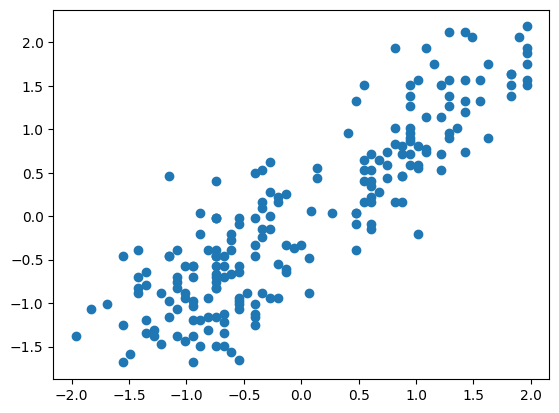

In [341]:
plt.scatter(train_scaled['flipper_length_mm'], train_scaled['body_mass_g'])

In [342]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [343]:
kn.score(test_scaled, test_target)

0.9710144927536232